In [1]:
#basic package
import tqdm
import os
import numpy as np
import glob
import pandas as pd
import sys
import time
import datetime as dt
import itertools
import re
import math

#plot
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
PACKAGE_PARENT = '../'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser('__file__'))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))
from UTILS import preprocessing_Origins,verification_based_on_initial_record,\
time_series_henColumn_tsRow,is_day,vertical_travel_distance, li_missingZone_mvtPerc_DU, li_event_chaoticmvt_z_d,\
ZoneVariable, HenDailyVariable_Origins, boxplot_distribution_entropy, heatmap_duration_perzone_perhen, TimeSeriesPlot_1row1day,\
nbr_transition, max_duration_zones, openDevice, DistributionEntropy
import config_origins as config

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Define parameters

In [5]:
print('change the configuration file if not done yet!')
path_extracted_data = config.path_extracted_data
path_initial_data = config.path_initial_data
id_run = config.id_run
dico_matching = config.dico_matching
print(id_run)

change the configuration file if not done yet!
correctlightschedule_


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Preprocessed data

In [7]:
df_init = pd.read_csv(os.path.join(path_extracted_data, id_run+'_PreprocessRecords_forcleaning.csv'), sep=';', index_col=0,
                      parse_dates=['date','Timestamp'], dayfirst=True) 
print(df_init.shape)
df_init['Zone'] = df_init['Zone'].map(lambda x: config.dico_matching[x])
df_init['PenID'] = df_init['PenID'].map(lambda x: 'pen'+str(x))
df_init['HenID'] = df_init['HenID'].map(lambda x: 'hen_'+str(x))
df_init = df_init.sort_values('Timestamp',ascending=True)
df_init.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\camil\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(3564465, 15)


,Timestamp,HenID,Zone,PenID,log_file_name,ts_order,TagID,signalstrength,system,time,date,zone2,signalstzone2,zone3,zone4
0,2020-09-29 09:07:00,hen_71,3_Zone,pen12,log_00000001,0,162,10,10 - 12,09:07:00,2020-09-29,2,8,1,0
1,2020-09-29 09:08:12,hen_7,3_Zone,pen11,log_00000001,1,140,10,10 - 12,09:08:12,2020-09-29,2,8,1,0
2,2020-09-29 09:08:26,hen_71,3_Zone,pen12,log_00000001,2,162,11,10 - 12,09:08:26,2020-09-29,8,10,3,1


## Variables data

In [8]:
df_daily = pd.read_csv(os.path.join(path_extracted_data, id_run+'_daily_ALL_variables.csv'), sep=';',
                 parse_dates=['level', 'FirstTimestamp_1_Zone', 'FirstTimestamp_2_Zone', 'FirstTimestamp_3_Zone',
                             'FirstTimestamp_4_Zone','FirstTimestamp_5_Zone'],
                 dayfirst=True) 
print(df_daily.shape)
df_daily.head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(27593, 134)


,HenID,level,duration_1_Zone,duration_2_Zone,duration_3_Zone,duration_4_Zone,duration_5_Zone,verification_daily_total_duration,dur_values,dur_values_normalized,...,list_of_night20_2_temperature,nbr_temperature_nnnan,temperature_night20_2_median,temperature_night20_2_max,temperature_night20_2_var,list_of_MovementCounter_day,len_MovementCounter_day,MovementCounter_day_amount_nnactivity,MovementCounter_day_max,MovementCounter_day_mean
0,hen_130,2020-10-04,0.0,140.0,1166.0,79.0,30613.0,31998.0,"[0.0, 140.0, 1166.0, 79.0, 30613.0]","[0.0, 0.004375273454590912, 0.0364397774860928...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hen_130,2020-10-05,0.0,0.0,0.0,0.0,32400.0,32400.0,"[0.0, 0.0, 0.0, 0.0, 32400.0]","[0.0, 0.0, 0.0, 0.0, 1.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hen_130,2020-10-06,0.0,0.0,780.0,325.0,31295.0,32400.0,"[0.0, 0.0, 780.0, 325.0, 31295.0]","[0.0, 0.0, 0.024074074074074074, 0.01003086419...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Verification

In [9]:
#print all column with nan
#X.columns[X.isna().any()].tolist()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
li_var = list(df_daily.columns)
li_general = ['HenID', 'level','PenID']
li_var_TODO = li_var #keep track of the columns that still needs to be verified
len(li_var_TODO)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


134

In [10]:
#display(list(li_var))

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Hens variables + disturbances days

In [12]:
li_weight = [i for i in df_daily.columns if 'weight' in i]
li_hens = ['CLASS','TagID','FocalLegringName','R-Pen','InitialStartDate']+li_weight
print(li_hens)

['CLASS', 'TagID', 'FocalLegringName', 'R-Pen', 'InitialStartDate', '29-09 weight', '10-12 juin weight', 'weight 23-11-2020', 'weight 04-01-2021', 'weight 01-02-21']


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#specific bird (in pen 9, on the 3,4,5 of October the hen had the night but not the day variables), let's see if in each date
#we have the hens info and not the other variable. On the 8, 9 th of OCtober it should have NO data at all
h = 'hen_90'
d = dt.datetime(2020,10,10)
df_daily[(df_daily['HenID']==h)&(df_daily['level']<=d)][li_general+li_hens+['duration_5_Zone',
                                                                            'night_Max_duration_zones']].sort_values(['level'])
#TO CHECK: Pen ID here even when the day variables is not here?

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,CLASS,TagID,FocalLegringName,R-Pen,InitialStartDate,29-09 weight,10-12 juin weight,weight 23-11-2020,weight 04-01-2021,weight 01-02-21,duration_5_Zone,night_Max_duration_zones
26485,hen_90,2020-09-29,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,311.0,3_Zone
26486,hen_90,2020-09-30,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,0.0,5_Zone
26487,hen_90,2020-10-01,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,783.0,3_Zone
26488,hen_90,2020-10-02,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,0.0,3_Zone
27566,hen_90,2020-10-03,9,LEXP,NaN,NaN,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,NaN,3_Zone
27567,hen_90,2020-10-04,9,LEXP,NaN,NaN,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,NaN,3_Zone
27568,hen_90,2020-10-05,9,LEXP,NaN,NaN,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,NaN,5_Zone
26489,hen_90,2020-10-06,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,31451.0,5_Zone
26490,hen_90,2020-10-07,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,32400.0,5_Zone
26491,hen_90,2020-10-10,9,LEXP,tag_104,13green,3.0,12.06.2020,1088.0,NaN,1520.9,1663.3,1764.0,35275.0,5_Zone


In [14]:
#verify that the day with weird device day (can be find here: *__LastactionGAP) are removed
h = 'hen_133'
dmin = dt.datetime(2021,1,9)
dmax = dt.datetime(2021,1,15)
df_daily[(df_daily['HenID']==h)&(df_daily['level']<=dmax)&(df_daily['level']>=dmin)][li_general+li_hens].sort_values(['level'])
#TO CHECK: Pen ID here even when the day variables is not here?
#TO DO AT THE END OF THE STUDY: check each indivudal case of GAP: for now olny tag 171 (hen 133)had big gaps, on those dates:
#30.10.2020, 10.01.2021, 11.01.2021, 13.01.2021
#CORRECT

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,CLASS,TagID,FocalLegringName,R-Pen,InitialStartDate,29-09 weight,10-12 juin weight,weight 23-11-2020,weight 04-01-2021,weight 01-02-21
7228,hen_133,2021-01-09,12,MEXP,tag_171,21black,4.0,10.06.2020,1228.0,70.7,1757.9,NaN,1808.9
7229,hen_133,2021-01-10,12,MEXP,tag_171,21black,4.0,10.06.2020,1228.0,70.7,1757.9,NaN,1808.9
7230,hen_133,2021-01-12,12,MEXP,tag_171,21black,4.0,10.06.2020,1228.0,70.7,1757.9,NaN,1808.9
7231,hen_133,2021-01-14,12,MEXP,tag_171,21black,4.0,10.06.2020,1228.0,70.7,1757.9,NaN,1808.9
7232,hen_133,2021-01-15,12,MEXP,tag_171,21black,4.0,10.06.2020,1228.0,70.7,1757.9,NaN,1808.9


In [15]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_hens]
len(li_var_TODO)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


124

## Device variables

In [16]:
#note that the device variables started on the 14.10.2020 around 20h
dmin = dt.datetime(2020,10,14)
li_device = [i for i in df_daily.columns if ('temperature' in i) | ('MovementCounter' in i)]
li_device

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['list_of_night20_2_temperature',
 'nbr_temperature_nnnan',
 'temperature_night20_2_median',
 'temperature_night20_2_max',
 'temperature_night20_2_var',
 'list_of_MovementCounter_day',
 'len_MovementCounter_day',
 'MovementCounter_day_amount_nnactivity',
 'MovementCounter_day_max',
 'MovementCounter_day_mean']

In [17]:
h = 'hen_130'
d = dt.datetime(2020,11,20)
df_daily[(df_daily['HenID']==h)&(df_daily['level']<=d)&(df_daily['level']>=dmin)][li_general+li_device].sort_values(['level'])

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,list_of_night20_2_temperature,nbr_temperature_nnnan,temperature_night20_2_median,temperature_night20_2_max,temperature_night20_2_var,list_of_MovementCounter_day,len_MovementCounter_day,MovementCounter_day_amount_nnactivity,MovementCounter_day_max,MovementCounter_day_mean
2819,hen_130,2020-10-15,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,hen_130,2020-10-16,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,hen_130,2020-10-17,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,hen_130,2020-10-18,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2823,hen_130,2020-10-19,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,hen_130,2020-10-20,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2825,hen_130,2020-10-21,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2826,hen_130,2020-10-22,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2827,hen_130,2020-10-23,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2828,hen_130,2020-10-24,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_device]
len(li_var_TODO)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


114

## Night

In [19]:
li_night = [i for i in li_var_TODO if ('night' in i)|('nbr_transition_at_' in i)] +['nbr_transition_next1hafterlightoff']
li_night

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['night_level',
 'night_Max_duration_zones',
 'night_distribution_entropy',
 'night_Total_number_transition',
 'nbr_transition_at_h0',
 'nbr_transition_at_h1',
 'nbr_transition_at_h2',
 'nbr_transition_at_h3',
 'nbr_transition_at_h4',
 'nbr_transition_at_h5',
 'nbr_transition_at_h6',
 'nbr_transition_at_h7',
 'nbr_transition_at_h8',
 'nbr_transition_at_h21',
 'nbr_transition_at_h22',
 'nbr_transition_at_h23',
 'nbr_transition_next1hafterlightoff']

In [20]:
#another bird, based on:
#df_daily[(df_daily['nbr_transition_at_h8']>3)&(df_daily['level']==dt.datetime(2020,10,7))].head(3)
h = 'hen_24'
d = dt.datetime(2020,10,7) #day of a change in the light schedule of the day: on the 7th it turned off at 18h and on the 8th it 
#turned on at 8h (not 9h sas it was on the 7th)
df = df_init[(df_init['HenID']==h)&((df_init['date']==d)|(df_init['date']==(d+dt.timedelta(days=1))))]
display(df_daily[(df_daily['HenID']==h)&((df_daily['level']==d)|(df_daily['level']==(d+dt.timedelta(days=1))))][li_general+li_night].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct 

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,night_level,night_Max_duration_zones,night_distribution_entropy,night_Total_number_transition,nbr_transition_at_h0,nbr_transition_at_h1,nbr_transition_at_h2,nbr_transition_at_h3,nbr_transition_at_h4,nbr_transition_at_h5,nbr_transition_at_h6,nbr_transition_at_h7,nbr_transition_at_h8,nbr_transition_at_h21,nbr_transition_at_h22,nbr_transition_at_h23,nbr_transition_next1hafterlightoff
25966,hen_24,2020-10-07,9,2020-10-07_08,4_Zone,0.543772,30.0,0.0,0.0,1.0,2.0,3.0,5.0,5.0,3.0,1.0,4.0,2.0,0.0,4.0


((Timestamp('2020-10-07 09:03:30'), '3_Zone'),
 (Timestamp('2020-10-07 09:08:34'), '3_Zone'),
 (Timestamp('2020-10-07 09:08:57'), '3_Zone'),
 (Timestamp('2020-10-07 09:12:27'), '2_Zone'),
 (Timestamp('2020-10-07 09:16:14'), '3_Zone'),
 (Timestamp('2020-10-07 09:17:22'), '4_Zone'),
 (Timestamp('2020-10-07 09:25:29'), '3_Zone'),
 (Timestamp('2020-10-07 09:26:25'), '3_Zone'),
 (Timestamp('2020-10-07 09:27:10'), '3_Zone'),
 (Timestamp('2020-10-07 09:27:41'), '2_Zone'),
 (Timestamp('2020-10-07 09:32:34'), '3_Zone'),
 (Timestamp('2020-10-07 09:33:53'), '3_Zone'),
 (Timestamp('2020-10-07 09:34:06'), '3_Zone'),
 (Timestamp('2020-10-07 09:34:24'), '3_Zone'),
 (Timestamp('2020-10-07 09:34:46'), '3_Zone'),
 (Timestamp('2020-10-07 09:35:45'), '3_Zone'),
 (Timestamp('2020-10-07 09:35:57'), '3_Zone'),
 (Timestamp('2020-10-07 09:37:41'), '4_Zone'),
 (Timestamp('2020-10-07 09:41:28'), '5_Zone'),
 (Timestamp('2020-10-07 10:16:38'), '4_Zone'),
 (Timestamp('2020-10-07 10:22:11'), '3_Zone'),
 (Timestamp('

In [37]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_night]
print(len(li_var_TODO))

95


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Transitions in aviary (zone 1, zone 2, zone 3, zone 4)

#### first timestamp in each zones

In [21]:
li_first_timestamp = [i for i in li_var if 'FirstTimestamp' in i]+['Total_number_zone']

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
#random bird
h = 'hen_89'
d = dt.datetime(2020,11,18)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
X = df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)]
display(X[li_general+li_first_timestamp])
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,FirstTimestamp_1_Zone,FirstTimestamp_2_Zone,FirstTimestamp_3_Zone,FirstTimestamp_4_Zone,FirstTimestamp_5_Zone,Total_number_zone
19921,hen_89,2020-11-18,5,NaT,2020-11-18 06:44:25,2020-11-18 05:25:03,2020-11-18 04:56:38,2020-11-18 02:00:00,4.0


((Timestamp('2020-11-18 04:56:38'), '4_Zone'),
 (Timestamp('2020-11-18 05:25:03'), '3_Zone'),
 (Timestamp('2020-11-18 06:04:03'), '3_Zone'),
 (Timestamp('2020-11-18 06:08:35'), '3_Zone'),
 (Timestamp('2020-11-18 06:11:06'), '3_Zone'),
 (Timestamp('2020-11-18 06:14:04'), '3_Zone'),
 (Timestamp('2020-11-18 06:20:13'), '3_Zone'),
 (Timestamp('2020-11-18 06:22:43'), '3_Zone'),
 (Timestamp('2020-11-18 06:23:31'), '3_Zone'),
 (Timestamp('2020-11-18 06:23:52'), '3_Zone'),
 (Timestamp('2020-11-18 06:25:39'), '3_Zone'),
 (Timestamp('2020-11-18 06:27:50'), '3_Zone'),
 (Timestamp('2020-11-18 06:29:21'), '3_Zone'),
 (Timestamp('2020-11-18 06:31:16'), '3_Zone'),
 (Timestamp('2020-11-18 06:36:47'), '3_Zone'),
 (Timestamp('2020-11-18 06:38:44'), '3_Zone'),
 (Timestamp('2020-11-18 06:44:25'), '2_Zone'),
 (Timestamp('2020-11-18 07:45:10'), '3_Zone'),
 (Timestamp('2020-11-18 07:45:51'), '3_Zone'),
 (Timestamp('2020-11-18 07:47:08'), '3_Zone'),
 (Timestamp('2020-11-18 07:47:42'), '3_Zone'),
 (Timestamp('

In [37]:
#specific bird
#df_daily[li_general+li_first_timestamp].head(3)
h = 'hen_130'
d = dt.datetime(2020,10,6)
df = df_init[(df_init['HenID']==h)&(df_init['date']<=d)]
X = df_daily[(df_daily['HenID']==h)&(df_daily['level']<=d)]
display(X[li_general+li_first_timestamp+['verification_daily_total_duration']])
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,FirstTimestamp_1_Zone,FirstTimestamp_2_Zone,FirstTimestamp_3_Zone,FirstTimestamp_4_Zone,FirstTimestamp_5_Zone,Total_number_zone,verification_daily_total_duration
0,hen_130,2020-10-04,10,NaT,2020-10-04 15:29:55,2020-10-04 09:06:42,2020-10-04 09:20:45,2020-10-04 09:21:49,4.0,31998.0
1,hen_130,2020-10-05,10,NaT,NaT,NaT,NaT,2020-10-05 09:00:00,1.0,32400.0
2,hen_130,2020-10-06,10,NaT,NaT,2020-10-06 09:08:52,2020-10-06 09:21:52,2020-10-06 09:00:00,3.0,32400.0


((Timestamp('2020-10-04 09:06:42'), '3_Zone'),
 (Timestamp('2020-10-04 09:07:18'), '3_Zone'),
 (Timestamp('2020-10-04 09:08:05'), '3_Zone'),
 (Timestamp('2020-10-04 09:08:21'), '3_Zone'),
 (Timestamp('2020-10-04 09:09:03'), '3_Zone'),
 (Timestamp('2020-10-04 09:11:58'), '3_Zone'),
 (Timestamp('2020-10-04 09:14:04'), '3_Zone'),
 (Timestamp('2020-10-04 09:14:16'), '3_Zone'),
 (Timestamp('2020-10-04 09:19:00'), '3_Zone'),
 (Timestamp('2020-10-04 09:20:45'), '4_Zone'),
 (Timestamp('2020-10-04 09:21:49'), '5_Zone'),
 (Timestamp('2020-10-04 15:29:51'), '3_Zone'),
 (Timestamp('2020-10-04 15:29:55'), '2_Zone'),
 (Timestamp('2020-10-04 15:32:15'), '3_Zone'),
 (Timestamp('2020-10-04 15:37:34'), '4_Zone'),
 (Timestamp('2020-10-04 15:37:49'), '5_Zone'),
 (Timestamp('2020-10-06 09:08:52'), '3_Zone'),
 (Timestamp('2020-10-06 09:09:27'), '3_Zone'),
 (Timestamp('2020-10-06 09:11:05'), '3_Zone'),
 (Timestamp('2020-10-06 09:12:24'), '3_Zone'),
 (Timestamp('2020-10-06 09:13:04'), '3_Zone'),
 (Timestamp('

In [24]:
#specific bird
#df_daily[li_general+li_first_timestamp].head(3)
h = 'hen_90'
d = dt.datetime(2020,10,6) #3,4,5 : tracking should not be used
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
X = df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)]
display(X[li_general+li_first_timestamp].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,FirstTimestamp_1_Zone,FirstTimestamp_2_Zone,FirstTimestamp_3_Zone,FirstTimestamp_4_Zone,FirstTimestamp_5_Zone,Total_number_zone
26489,hen_90,2020-10-06,9,NaT,2020-10-06 11:57:00,2020-10-06 12:07:21,2020-10-06 12:09:00,2020-10-06 09:00:00,4.0


((Timestamp('2020-10-06 08:28:02'), '4_Zone'),
 (Timestamp('2020-10-06 08:28:05'), '5_Zone'),
 (Timestamp('2020-10-06 08:31:16'), '4_Zone'),
 (Timestamp('2020-10-06 08:31:22'), '5_Zone'),
 (Timestamp('2020-10-06 08:43:38'), '4_Zone'),
 (Timestamp('2020-10-06 08:43:47'), '5_Zone'),
 (Timestamp('2020-10-06 09:27:49'), '2_Zone'),
 (Timestamp('2020-10-06 09:27:57'), '5_Zone'),
 (Timestamp('2020-10-06 09:30:59'), '4_Zone'),
 (Timestamp('2020-10-06 09:31:07'), '5_Zone'),
 (Timestamp('2020-10-06 09:38:29'), '4_Zone'),
 (Timestamp('2020-10-06 09:38:31'), '5_Zone'),
 (Timestamp('2020-10-06 10:03:48'), '4_Zone'),
 (Timestamp('2020-10-06 10:04:17'), '5_Zone'),
 (Timestamp('2020-10-06 11:18:47'), '3_Zone'),
 (Timestamp('2020-10-06 11:18:59'), '5_Zone'),
 (Timestamp('2020-10-06 11:27:03'), '3_Zone'),
 (Timestamp('2020-10-06 11:27:12'), '5_Zone'),
 (Timestamp('2020-10-06 11:33:30'), '4_Zone'),
 (Timestamp('2020-10-06 11:34:10'), '5_Zone'),
 (Timestamp('2020-10-06 11:48:15'), '4_Zone'),
 (Timestamp('

In [42]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_first_timestamp]
len(li_var_TODO)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


89

#### Chaotic/motor transition

In [43]:
li_chaotic = [x for x in li_var if 'chaotic' in x]

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
#random bird
h = 'hen_89'
#d = dt.datetime(2020,11,18)
d = dt.datetime(2020,11,1)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
X = df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)]
display(X[li_chaotic])
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
display(dt.datetime(2020,11,1,11,55,56)-dt.datetime(2020,11,1,10,26,45),
dt.datetime(2020,11,1,12,25,54)-dt.datetime(2020,11,1,12,20,19))
#-->correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,li_event_chaoticmvt_z_d,dico_z_chaoticmvtMiddleDuration,chaoticmvt_Middle1_Zone,chaoticmvt_Middle2_Zone,chaoticmvt_Middle3_Zone,chaoticmvt_Middle4_Zone,chaoticmvt_Middle5_Zone,chaoticmvt_Middle1_Zone_nbr_180mn,chaoticmvt_Middle1_Zone_nbr_900mn,chaoticmvt_Middle2_Zone_nbr_180mn,chaoticmvt_Middle2_Zone_nbr_900mn,chaoticmvt_Middle3_Zone_nbr_180mn,chaoticmvt_Middle3_Zone_nbr_900mn,chaoticmvt_Middle4_Zone_nbr_180mn,chaoticmvt_Middle4_Zone_nbr_900mn,chaoticmvt_Middle5_Zone_nbr_180mn,chaoticmvt_Middle5_Zone_nbr_900mn
13860,"[('4_Zone', 267.0), ('5_Zone', 118.0), (None, ...","{'chaoticmvt_Middle4_Zone': [267.0, 144.0, 131...",0,[335.0],"[85.0, 392.0, 12.0]","[267.0, 144.0, 131.0]","[118.0, 48.0, 41.0, 278.0, 5351.0]",0.0,0.0,0.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0
20537,"[('4_Zone', 267.0), ('5_Zone', 118.0), (None, ...","{'chaoticmvt_Middle4_Zone': [267.0, 144.0, 131...",0,[335.0],"[85.0, 392.0]","[267.0, 144.0, 131.0]","[118.0, 48.0, 41.0, 278.0, 5351.0]",0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0


((Timestamp('2020-11-01 04:21:41'), '4_Zone'),
 (Timestamp('2020-11-01 04:26:08'), '5_Zone'),
 (Timestamp('2020-11-01 04:28:06'), '4_Zone'),
 (Timestamp('2020-11-01 04:28:24'), '3_Zone'),
 (Timestamp('2020-11-01 04:29:49'), '4_Zone'),
 (Timestamp('2020-11-01 04:32:01'), '5_Zone'),
 (Timestamp('2020-11-01 04:32:49'), '4_Zone'),
 (Timestamp('2020-11-01 04:35:13'), '5_Zone'),
 (Timestamp('2020-11-01 04:35:54'), '4_Zone'),
 (Timestamp('2020-11-01 04:38:05'), '5_Zone'),
 (Timestamp('2020-11-01 04:42:43'), '4_Zone'),
 (Timestamp('2020-11-01 05:02:36'), '3_Zone'),
 (Timestamp('2020-11-01 05:07:16'), '3_Zone'),
 (Timestamp('2020-11-01 05:08:38'), '3_Zone'),
 (Timestamp('2020-11-01 05:09:08'), '4_Zone'),
 (Timestamp('2020-11-01 05:09:26'), '5_Zone'),
 (Timestamp('2020-11-01 05:52:44'), '3_Zone'),
 (Timestamp('2020-11-01 05:52:56'), '5_Zone'),
 (Timestamp('2020-11-01 08:34:09'), '2_Zone'),
 (Timestamp('2020-11-01 09:00:12'), '3_Zone'),
 (Timestamp('2020-11-01 09:00:55'), '3_Zone'),
 (Timestamp('

datetime.timedelta(seconds=5351)

datetime.timedelta(seconds=335)

In [45]:
#specific brd
#df_daily[df_daily['chaoticmvt_Middle2_Zone_nbr']>0][['HenID','level']+li_chaotic]
h = 'hen_131'
d = dt.datetime(2020,10,2)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
X = df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)]
display(X[li_chaotic])
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
display(dt.datetime(2020,10,2,9,37,35)-dt.datetime(2020,10,2,9,19,12),
dt.datetime(2020,10,2,9,37,43)-dt.datetime(2020,10,2,9,37,35))
#-->correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,li_event_chaoticmvt_z_d,dico_z_chaoticmvtMiddleDuration,chaoticmvt_Middle1_Zone,chaoticmvt_Middle2_Zone,chaoticmvt_Middle3_Zone,chaoticmvt_Middle4_Zone,chaoticmvt_Middle5_Zone,chaoticmvt_Middle1_Zone_nbr_180mn,chaoticmvt_Middle1_Zone_nbr_900mn,chaoticmvt_Middle2_Zone_nbr_180mn,chaoticmvt_Middle2_Zone_nbr_900mn,chaoticmvt_Middle3_Zone_nbr_180mn,chaoticmvt_Middle3_Zone_nbr_900mn,chaoticmvt_Middle4_Zone_nbr_180mn,chaoticmvt_Middle4_Zone_nbr_900mn,chaoticmvt_Middle5_Zone_nbr_180mn,chaoticmvt_Middle5_Zone_nbr_900mn
6,"[('2_Zone', 1103.0), ('3_Zone', 8.0), ('2_Zone...","{'chaoticmvt_Middle2_Zone': [1103.0, 366.0, 22...",0,"[1103.0, 366.0, 2240.0, 901.0, 1050.0, 1574.0,...","[8.0, 15.0, 1805.0, 36.0, 66.0, 440.0, 16.0]",0,0,0.0,0.0,1.0,3.0,5.0,6.0,0.0,0.0,0.0,0.0


((Timestamp('2020-10-02 09:02:16'), '3_Zone'),
 (Timestamp('2020-10-02 09:03:02'), '3_Zone'),
 (Timestamp('2020-10-02 09:03:51'), '3_Zone'),
 (Timestamp('2020-10-02 09:04:16'), '3_Zone'),
 (Timestamp('2020-10-02 09:06:36'), '3_Zone'),
 (Timestamp('2020-10-02 09:10:26'), '3_Zone'),
 (Timestamp('2020-10-02 09:12:45'), '3_Zone'),
 (Timestamp('2020-10-02 09:14:07'), '3_Zone'),
 (Timestamp('2020-10-02 09:15:20'), '3_Zone'),
 (Timestamp('2020-10-02 09:16:02'), '3_Zone'),
 (Timestamp('2020-10-02 09:19:12'), '2_Zone'),
 (Timestamp('2020-10-02 09:37:35'), '3_Zone'),
 (Timestamp('2020-10-02 09:37:43'), '2_Zone'),
 (Timestamp('2020-10-02 09:43:49'), '3_Zone'),
 (Timestamp('2020-10-02 09:44:04'), '2_Zone'),
 (Timestamp('2020-10-02 10:21:24'), '3_Zone'),
 (Timestamp('2020-10-02 10:32:32'), '3_Zone'),
 (Timestamp('2020-10-02 10:34:08'), '3_Zone'),
 (Timestamp('2020-10-02 10:34:21'), '3_Zone'),
 (Timestamp('2020-10-02 10:39:15'), '3_Zone'),
 (Timestamp('2020-10-02 10:39:55'), '3_Zone'),
 (Timestamp('

datetime.timedelta(seconds=1103)

datetime.timedelta(seconds=8)

In [46]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_chaotic]
len(li_var_TODO)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


72

### transitions & stays

In [27]:
li_transition_rest = ['vertical_travel_distance','Total_number_transition']+[i for i in li_var if 'missing' in i]
li_stays = [i for i in li_var if ('stay' in i)|('bouts'in i)]

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
#random bird
h = 'hen_130'
d = dt.datetime(2020,10,7)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_transition_rest].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,vertical_travel_distance,Total_number_transition,t_DU_missingZone_mvtPerc,down_missingZone_mvtPerc,up_missingZone_mvtPerc
3,hen_130,2020-10-07,10,4.0,4.0,"(0.0, 0.0, 5)",0.0,0.0


((Timestamp('2020-10-07 05:15:51'), '3_Zone'),
 (Timestamp('2020-10-07 05:15:53'), '3_Zone'),
 (Timestamp('2020-10-07 09:03:45'), '2_Zone'),
 (Timestamp('2020-10-07 09:07:11'), '3_Zone'),
 (Timestamp('2020-10-07 09:07:35'), '4_Zone'),
 (Timestamp('2020-10-07 09:09:45'), '5_Zone'))

In [29]:
#another random bird
h = 'hen_30'
d = dt.datetime(2020,10,4) #9h-18h
df = df_init[(df_init['HenID']==h)&(df_init['Timestamp']<=dt.datetime(2020,10,4,18,0,0))]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_transition_rest].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#vertical_travel_distance: 23 is correct (note: it came from 5 to 2 at 12:20:20)
#down_missingZone_mvtPerc corret: 2/20*100=10% (one from 5 to 2 and one from 4 to 2), we had 20 transitions
#--> correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,vertical_travel_distance,Total_number_transition,t_DU_missingZone_mvtPerc,down_missingZone_mvtPerc,up_missingZone_mvtPerc
12321,hen_30,2020-10-04,3,23.0,20.0,"(10.0, 0.0, 21)",10.0,0.0


((Timestamp('2020-09-29 09:44:28'), '3_Zone'),
 (Timestamp('2020-09-29 09:44:31'), '3_Zone'),
 (Timestamp('2020-09-29 09:47:41'), '2_Zone'),
 (Timestamp('2020-09-29 09:52:07'), '5_Zone'),
 (Timestamp('2020-09-29 15:22:48'), '3_Zone'),
 (Timestamp('2020-09-29 16:25:38'), '4_Zone'),
 (Timestamp('2020-09-29 16:27:06'), '5_Zone'),
 (Timestamp('2020-10-01 17:03:23'), '2_Zone'),
 (Timestamp('2020-10-01 17:09:42'), '3_Zone'),
 (Timestamp('2020-10-01 17:17:16'), '5_Zone'),
 (Timestamp('2020-10-02 17:13:39'), '3_Zone'),
 (Timestamp('2020-10-02 17:19:32'), '4_Zone'),
 (Timestamp('2020-10-02 17:20:28'), '5_Zone'),
 (Timestamp('2020-10-04 12:20:20'), '2_Zone'),
 (Timestamp('2020-10-04 13:21:13'), '3_Zone'),
 (Timestamp('2020-10-04 13:23:18'), '4_Zone'),
 (Timestamp('2020-10-04 13:32:01'), '2_Zone'),
 (Timestamp('2020-10-04 13:54:28'), '3_Zone'),
 (Timestamp('2020-10-04 14:08:17'), '2_Zone'),
 (Timestamp('2020-10-04 14:18:48'), '3_Zone'),
 (Timestamp('2020-10-04 14:20:46'), '2_Zone'),
 (Timestamp('

In [30]:
#same bird
h = 'hen_30'
d = dt.datetime(2020,10,4) #9h-18h
df = df_init[(df_init['HenID']==h)&(df_init['Timestamp']<=dt.datetime(2020,10,4,18,0,0))]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_stays].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#vertical_travel_distance: 23 is correct (note: it came from 5 to 2 at 12:20:20)
#total_number of transition: 21 rows including 2 repetitives so its 20
#stay_longer_60sec_4_Zone: correct, it did not counted the one of <60seconds
#down_missingZone_mvtPerc corret: 2/21*100=9,5% (one from 5 to 2 and one from 4 to 2)
#stay_longer_60sec_4_Zone: correct, it did not counted the one of <60seconds
#note that the stay_* is at amximum one mroe thant the total number of transition
#total_number of transition: 21 rows including a repetition of 3_zone so its 20
#--> correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,nbr_stays,nbr_stays_3_Zone,nbr_stays_4_Zone,nbr_stays_5_Zone,nbr_stays_2_Zone,nbr_stays_1_Zone,stay_longer_60sec,stay_longer_60sec_3_Zone,stay_longer_60sec_4_Zone,stay_longer_60sec_5_Zone,stay_longer_60sec_2_Zone,stay_longer_60sec_1_Zone
12321,hen_30,2020-10-04,3,"{'5_Zone': 2, '2_Zone': 8, '3_Zone': 8, '4_Zon...",8.0,3.0,2.0,8.0,0.0,20.0,8.0,2.0,2.0,8.0,0.0


((Timestamp('2020-09-29 09:44:28'), '3_Zone'),
 (Timestamp('2020-09-29 09:44:31'), '3_Zone'),
 (Timestamp('2020-09-29 09:47:41'), '2_Zone'),
 (Timestamp('2020-09-29 09:52:07'), '5_Zone'),
 (Timestamp('2020-09-29 15:22:48'), '3_Zone'),
 (Timestamp('2020-09-29 16:25:38'), '4_Zone'),
 (Timestamp('2020-09-29 16:27:06'), '5_Zone'),
 (Timestamp('2020-10-01 17:03:23'), '2_Zone'),
 (Timestamp('2020-10-01 17:09:42'), '3_Zone'),
 (Timestamp('2020-10-01 17:17:16'), '5_Zone'),
 (Timestamp('2020-10-02 17:13:39'), '3_Zone'),
 (Timestamp('2020-10-02 17:19:32'), '4_Zone'),
 (Timestamp('2020-10-02 17:20:28'), '5_Zone'),
 (Timestamp('2020-10-04 12:20:20'), '2_Zone'),
 (Timestamp('2020-10-04 13:21:13'), '3_Zone'),
 (Timestamp('2020-10-04 13:23:18'), '4_Zone'),
 (Timestamp('2020-10-04 13:32:01'), '2_Zone'),
 (Timestamp('2020-10-04 13:54:28'), '3_Zone'),
 (Timestamp('2020-10-04 14:08:17'), '2_Zone'),
 (Timestamp('2020-10-04 14:18:48'), '3_Zone'),
 (Timestamp('2020-10-04 14:20:46'), '2_Zone'),
 (Timestamp('

In [31]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_stays]
li_var_TODO = [i for i in li_var_TODO if i not in li_transition_rest]
print(len(li_var_TODO))

97


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## duration

In [52]:
li_dur = [i for i in li_var_TODO if ('duration' in i)&('Nestbox' not in i)&('WG' not in i)&('night' not in i)]
li_dur

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['duration_1_Zone',
 'duration_2_Zone',
 'duration_3_Zone',
 'duration_4_Zone',
 'duration_5_Zone',
 'verification_daily_total_duration',
 'list_of_durations',
 'Max_duration_zones',
 'dico_zone_sortedduration',
 'Max_duration_zone_4',
 'mean_duration',
 'median_duration',
 'max_duration',
 'min_duration',
 'variance_duration',
 'median_abs_deviation_duration',
 'duration_last-firsttransition_mn']

In [25]:
#same bird
h = 'hen_130'
d = dt.datetime(2020,10,7) #9h-18h is the day
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_dur].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#duration_*_zone, correct:
display(dt.datetime(2020,10,7,9,3,45)-dt.datetime(2020,10,7,9,0,0),#zone 3 #225
dt.datetime(2020,10,7,9,7,11)-dt.datetime(2020,10,7,9,3,45), #zone 2 #206
dt.datetime(2020,10,7,9,7,35)-dt.datetime(2020,10,7,9,7,11), #zone 3 #24
dt.datetime(2020,10,7,9,9,45)-dt.datetime(2020,10,7,9,7,35), #zone 4 #130
dt.datetime(2020,10,7,18,0,0)-dt.datetime(2020,10,7,9,9,45)) #zone 5 #31815
#rest also correct
#--> correct (should all be in seconds except when explicitely written "_mn")

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'li_dur' is not defined

In [54]:
#same bird
h = 'hen_18'
d = dt.datetime(2020,10,7) #9h-18h is the day
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_dur].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#duration_last-firsttransition_mn: 
display((dt.datetime(2020,10,7,16,21,18)-dt.datetime(2020,10,7,9,6,6)).total_seconds()/60)
#-->correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,duration_1_Zone,duration_2_Zone,duration_3_Zone,duration_4_Zone,duration_5_Zone,verification_daily_total_duration,list_of_durations,Max_duration_zones,dico_zone_sortedduration,Max_duration_zone_4,mean_duration,median_duration,max_duration,min_duration,variance_duration,median_abs_deviation_duration,duration_last-firsttransition_mn
17590,hen_18,2020-10-07,9,0.0,0.0,0.0,148.0,32252.0,32400.0,"[366.0, 6.0, 12326.0, 51.0, 2134.0, 56.0, 2741...",5_Zone,"{'4_Zone': [5.0, 6.0, 6.0, 24.0, 51.0, 56.0], ...",56.0,2492.307692,201.0,12326.0,5.0,1.475425e+07,195.0,435.0


((Timestamp('2020-10-07 08:53:49'), '4_Zone'),
 (Timestamp('2020-10-07 08:53:53'), '5_Zone'),
 (Timestamp('2020-10-07 09:06:06'), '4_Zone'),
 (Timestamp('2020-10-07 09:06:12'), '5_Zone'),
 (Timestamp('2020-10-07 12:31:38'), '4_Zone'),
 (Timestamp('2020-10-07 12:32:29'), '5_Zone'),
 (Timestamp('2020-10-07 13:08:03'), '4_Zone'),
 (Timestamp('2020-10-07 13:08:59'), '5_Zone'),
 (Timestamp('2020-10-07 13:54:40'), '4_Zone'),
 (Timestamp('2020-10-07 13:54:46'), '5_Zone'),
 (Timestamp('2020-10-07 16:17:28'), '4_Zone'),
 (Timestamp('2020-10-07 16:17:52'), '5_Zone'),
 (Timestamp('2020-10-07 16:21:13'), '4_Zone'),
 (Timestamp('2020-10-07 16:21:18'), '5_Zone'))

435.2

In [55]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_dur]
print(len(li_var_TODO))

38


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Nestbox

In [56]:
li_nb = [i for i in li_var_TODO if 'Nestbox' in i]+ ['sucessIntrusion_9','NBtimefirstvisitlonger900_minus_time1visit']
li_nb

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Nestbox_time_of_first_staid_longer_than900sec',
 'BNestboxHour_nbrd',
 'B10h_Nestbox_nbrvisit',
 'B10h_Nestbox_Longestduration',
 'ANestboxHour_nbrd',
 'A12h_Nestbox_nbrvisit',
 'A12h_Nestbox_Longestduration',
 'sucessIntrusion_9',
 'NBtimefirstvisitlonger900_minus_time1visit']

In [64]:
#same bird
#22.11.2020: from 3h to 17h the light is on: day time
h = 'hen_54'
d = dt.datetime(2020,11,22) #late date to have nestbox usage
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_nb].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
display((dt.datetime(2020,11,22,5,13,10)-dt.datetime(2020,11,22,4,45,21)).total_seconds())
display((dt.datetime(2020,11,22,4,45,21)-dt.datetime(2020,11,22,4,15,21)).total_seconds())
#CORRECT!
#Note that: B10h_Nestbox_nbrvisit is the number of visits DURING DAY TIME in the test box

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,Nestbox_time_of_first_staid_longer_than900sec,BNestboxHour_nbrd,B10h_Nestbox_nbrvisit,B10h_Nestbox_Longestduration,ANestboxHour_nbrd,A12h_Nestbox_nbrvisit,A12h_Nestbox_Longestduration,sucessIntrusion_9,NBtimefirstvisitlonger900_minus_time1visit
1351,hen_54,2020-11-22,10,2020-11-22 04:45:21,"(3, 1669.0)",3.0,1669.0,"(0, 0)",0.0,0.0,0.333333,1800.0


((Timestamp('2020-11-22 02:04:58'), '4_Zone'),
 (Timestamp('2020-11-22 02:05:20'), '3_Zone'),
 (Timestamp('2020-11-22 02:05:33'), '3_Zone'),
 (Timestamp('2020-11-22 02:05:41'), '3_Zone'),
 (Timestamp('2020-11-22 02:06:55'), '3_Zone'),
 (Timestamp('2020-11-22 02:07:11'), '3_Zone'),
 (Timestamp('2020-11-22 02:08:33'), '3_Zone'),
 (Timestamp('2020-11-22 02:09:22'), '3_Zone'),
 (Timestamp('2020-11-22 02:09:50'), '2_Zone'),
 (Timestamp('2020-11-22 02:25:45'), '3_Zone'),
 (Timestamp('2020-11-22 02:26:24'), '2_Zone'),
 (Timestamp('2020-11-22 02:28:57'), '3_Zone'),
 (Timestamp('2020-11-22 02:29:37'), '2_Zone'),
 (Timestamp('2020-11-22 02:29:47'), '3_Zone'),
 (Timestamp('2020-11-22 02:30:38'), '3_Zone'),
 (Timestamp('2020-11-22 02:31:03'), '3_Zone'),
 (Timestamp('2020-11-22 02:31:13'), '3_Zone'),
 (Timestamp('2020-11-22 02:31:53'), '3_Zone'),
 (Timestamp('2020-11-22 02:33:35'), '3_Zone'),
 (Timestamp('2020-11-22 02:37:12'), '3_Zone'),
 (Timestamp('2020-11-22 02:40:16'), '3_Zone'),
 (Timestamp('

1669.0

1800.0

In [65]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_nb]
print(len(li_var_TODO))
display(li_var_TODO)

29


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['HenID',
 'level',
 'dur_values',
 'dur_values_normalized',
 'list_of_zones',
 'distribution_entropy',
 'percentile_5',
 'percentile_15',
 'percentile_85',
 'percentile_95',
 '0',
 '1_Zone_tuple_ts_dur',
 '2_Zone_tuple_ts_dur',
 '3_Zone_tuple_ts_dur',
 '4_Zone_tuple_ts_dur',
 '5_Zone_tuple_ts_dur',
 'list_timestamps',
 'list_timestamps_seondsOfTheDay',
 'activity_25percentile_sec',
 'activity_25percentile_time',
 'activity_50percentile_sec',
 'activity_50percentile_time',
 'activity_5percentile_sec',
 'activity_5percentile_time',
 'activity_95percentile_sec',
 'activity_95percentile_time',
 'in_WG_15mnAfterOpening',
 'Max_duration_WG',
 'PenID']

## WG

In [66]:
li_wg = [i for i in li_var_TODO if 'WG' in i]
li_wg

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['in_WG_15mnAfterOpening', 'Max_duration_WG']

In [67]:
#bird based on : df_daily[df_daily['Max_duration_WG']>0].tail(15)
h = 'hen_98'
d = dt.datetime(2021,1,10)  #10h a 16h20(to be checked with new data)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_wg].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,in_WG_15mnAfterOpening,Max_duration_WG
18788,hen_98,2021-01-10,9,False,65.0


((Timestamp('2021-01-10 06:26:34'), '4_Zone'),
 (Timestamp('2021-01-10 08:55:57'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:09'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:14'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:20'), '2_Zone'),
 (Timestamp('2021-01-10 09:15:07'), '3_Zone'),
 (Timestamp('2021-01-10 09:21:16'), '3_Zone'),
 (Timestamp('2021-01-10 09:21:31'), '3_Zone'),
 (Timestamp('2021-01-10 09:33:12'), '4_Zone'),
 (Timestamp('2021-01-10 09:33:43'), '5_Zone'),
 (Timestamp('2021-01-10 09:34:41'), '4_Zone'),
 (Timestamp('2021-01-10 09:34:58'), '3_Zone'),
 (Timestamp('2021-01-10 09:35:05'), '2_Zone'),
 (Timestamp('2021-01-10 09:39:09'), '1_Zone'),
 (Timestamp('2021-01-10 09:39:39'), '2_Zone'),
 (Timestamp('2021-01-10 09:49:14'), '3_Zone'),
 (Timestamp('2021-01-10 10:12:51'), '4_Zone'),
 (Timestamp('2021-01-10 10:14:11'), '5_Zone'),
 (Timestamp('2021-01-10 12:45:55'), '4_Zone'),
 (Timestamp('2021-01-10 12:46:06'), '3_Zone'),
 (Timestamp('2021-01-10 12:46:08'), '2_Zone'),
 (Timestamp('

In [68]:
#random bird
h = 'hen_12'
d = dt.datetime(2021,1,9)  #10h a 16h20(to be checked with new data)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_wg].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
display(dt.datetime(2021,1,15,9,14)-dt.datetime(2021,1,15,8,58),
       dt.datetime(2021,1,15,10,55)-dt.datetime(2021,1,15,9,23))
#Correct

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,in_WG_15mnAfterOpening,Max_duration_WG
12591,hen_12,2021-01-09,5,False,92.0
19530,hen_12,2021-01-09,5,False,0.0


((Timestamp('2021-01-09 03:44:18'), '4_Zone'),
 (Timestamp('2021-01-09 04:45:58'), '3_Zone'),
 (Timestamp('2021-01-09 05:12:52'), '3_Zone'),
 (Timestamp('2021-01-09 05:13:20'), '3_Zone'),
 (Timestamp('2021-01-09 05:13:57'), '3_Zone'),
 (Timestamp('2021-01-09 05:14:08'), '3_Zone'),
 (Timestamp('2021-01-09 05:14:14'), '3_Zone'),
 (Timestamp('2021-01-09 05:14:22'), '3_Zone'),
 (Timestamp('2021-01-09 05:16:03'), '3_Zone'),
 (Timestamp('2021-01-09 05:16:59'), '3_Zone'),
 (Timestamp('2021-01-09 05:17:19'), '2_Zone'),
 (Timestamp('2021-01-09 05:27:22'), '3_Zone'),
 (Timestamp('2021-01-09 05:28:07'), '3_Zone'),
 (Timestamp('2021-01-09 05:29:31'), '3_Zone'),
 (Timestamp('2021-01-09 05:53:33'), '3_Zone'),
 (Timestamp('2021-01-09 05:56:31'), '2_Zone'),
 (Timestamp('2021-01-09 06:04:43'), '3_Zone'),
 (Timestamp('2021-01-09 06:11:59'), '4_Zone'),
 (Timestamp('2021-01-09 06:12:13'), '5_Zone'),
 (Timestamp('2021-01-09 09:47:05'), '4_Zone'),
 (Timestamp('2021-01-09 09:47:22'), '3_Zone'),
 (Timestamp('

datetime.timedelta(seconds=960)

datetime.timedelta(seconds=5520)

In [69]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_wg]
print(len(li_var_TODO))
display(li_var_TODO)

27


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['HenID',
 'level',
 'dur_values',
 'dur_values_normalized',
 'list_of_zones',
 'distribution_entropy',
 'percentile_5',
 'percentile_15',
 'percentile_85',
 'percentile_95',
 '0',
 '1_Zone_tuple_ts_dur',
 '2_Zone_tuple_ts_dur',
 '3_Zone_tuple_ts_dur',
 '4_Zone_tuple_ts_dur',
 '5_Zone_tuple_ts_dur',
 'list_timestamps',
 'list_timestamps_seondsOfTheDay',
 'activity_25percentile_sec',
 'activity_25percentile_time',
 'activity_50percentile_sec',
 'activity_50percentile_time',
 'activity_5percentile_sec',
 'activity_5percentile_time',
 'activity_95percentile_sec',
 'activity_95percentile_time',
 'PenID']

## Activity

In [70]:
li_activity = [i for i in li_var_TODO if ('activity' in i)|('percentile' in i)]
li_activity

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['percentile_5',
 'percentile_15',
 'percentile_85',
 'percentile_95',
 'activity_25percentile_sec',
 'activity_25percentile_time',
 'activity_50percentile_sec',
 'activity_50percentile_time',
 'activity_5percentile_sec',
 'activity_5percentile_time',
 'activity_95percentile_sec',
 'activity_95percentile_time']

In [71]:
#random bird
h = 'hen_98'
d = dt.datetime(2021,1,10)  #10h a 16h20(to be checked with new data)
df = df_init[(df_init['HenID']==h)&(df_init['date']==d)]
display(df_daily[(df_daily['HenID']==h)&(df_daily['level']==d)][li_general+li_activity].sort_values(['level']))
display(tuple(zip(df['Timestamp'].tolist(),df['Zone'].tolist())))
#-->correct 

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,percentile_5,percentile_15,percentile_85,percentile_95,activity_25percentile_sec,activity_25percentile_time,activity_50percentile_sec,activity_50percentile_time,activity_5percentile_sec,activity_5percentile_time,activity_95percentile_sec,activity_95percentile_time
18788,hen_98,2021-01-10,9,9.2,17.0,1417.0,8963.0,34498.0,09:34:58,45966.0,12:46:06,32157.0,08:55:57,54363.0,15:06:03


((Timestamp('2021-01-10 06:26:34'), '4_Zone'),
 (Timestamp('2021-01-10 08:55:57'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:09'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:14'), '3_Zone'),
 (Timestamp('2021-01-10 08:56:20'), '2_Zone'),
 (Timestamp('2021-01-10 09:15:07'), '3_Zone'),
 (Timestamp('2021-01-10 09:21:16'), '3_Zone'),
 (Timestamp('2021-01-10 09:21:31'), '3_Zone'),
 (Timestamp('2021-01-10 09:33:12'), '4_Zone'),
 (Timestamp('2021-01-10 09:33:43'), '5_Zone'),
 (Timestamp('2021-01-10 09:34:41'), '4_Zone'),
 (Timestamp('2021-01-10 09:34:58'), '3_Zone'),
 (Timestamp('2021-01-10 09:35:05'), '2_Zone'),
 (Timestamp('2021-01-10 09:39:09'), '1_Zone'),
 (Timestamp('2021-01-10 09:39:39'), '2_Zone'),
 (Timestamp('2021-01-10 09:49:14'), '3_Zone'),
 (Timestamp('2021-01-10 10:12:51'), '4_Zone'),
 (Timestamp('2021-01-10 10:14:11'), '5_Zone'),
 (Timestamp('2021-01-10 12:45:55'), '4_Zone'),
 (Timestamp('2021-01-10 12:46:06'), '3_Zone'),
 (Timestamp('2021-01-10 12:46:08'), '2_Zone'),
 (Timestamp('

In [72]:
#update the list of variable that we still need to verify
li_var_TODO = [i for i in li_var_TODO if i not in li_activity]
print(len(li_var_TODO))
display(li_var_TODO)

15


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['HenID',
 'level',
 'dur_values',
 'dur_values_normalized',
 'list_of_zones',
 'distribution_entropy',
 '0',
 '1_Zone_tuple_ts_dur',
 '2_Zone_tuple_ts_dur',
 '3_Zone_tuple_ts_dur',
 '4_Zone_tuple_ts_dur',
 '5_Zone_tuple_ts_dur',
 'list_timestamps',
 'list_timestamps_seondsOfTheDay',
 'PenID']

## Other

print(len(li_var_TODO))
display(li_var_TODO)
-_> only: distribution_entropy and verification_daily_total_duration is important, the rest is meant to help debugung in case of errors

In [73]:
df_daily['verification_daily_total_duration'].value_counts()

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


54000.0    9194
39600.0    1270
46800.0    1256
50400.0    1246
52200.0    1066
48600.0    1056
43200.0     985
32400.0     798
36000.0     603
28800.0      65
26975.0       1
30035.0       1
31998.0       1
43463.0       1
31973.0       1
31704.0       1
47335.0       1
47275.0       1
43142.0       1
26654.0       1
5639.0        1
11274.0       1
19473.0       1
22910.0       1
42975.0       1
31129.0       1
42619.0       1
13292.0       1
42888.0       1
42853.0       1
38723.0       1
42805.0       1
31632.0       1
24396.0       1
13713.0       1
32188.0       1
42538.0       1
40415.0       1
26342.0       1
29345.0       1
42092.0       1
3397.0        1
42955.0       1
31747.0       1
Name: verification_daily_total_duration, dtype: int64

In [74]:
df_daily[df_daily['verification_daily_total_duration']==36000] #knwoing: dico_night_hour, its correct: 36000=10h

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,duration_1_Zone,duration_2_Zone,duration_3_Zone,duration_4_Zone,duration_5_Zone,verification_daily_total_duration,dur_values,dur_values_normalized,...,list_of_night20_2_temperature,nbr_temperature_nnnan,temperature_night20_2_median,temperature_night20_2_max,temperature_night20_2_var,list_of_MovementCounter_day,len_MovementCounter_day,MovementCounter_day_amount_nnactivity,MovementCounter_day_max,MovementCounter_day_mean
11,hen_131,2020-10-10,0.0,20452.0,14514.0,646.0,388.0,36000.0,"[0.0, 20452.0, 14514.0, 646.0, 388.0]","[0.0, 0.5681111111111111, 0.4031666666666667, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,hen_131,2020-10-11,0.0,21280.0,13709.0,605.0,406.0,36000.0,"[0.0, 21280.0, 13709.0, 605.0, 406.0]","[0.0, 0.5911111111111111, 0.38080555555555556,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,hen_131,2020-10-12,0.0,13353.0,8736.0,1417.0,12494.0,36000.0,"[0.0, 13353.0, 8736.0, 1417.0, 12494.0]","[0.0, 0.3709166666666667, 0.24266666666666667,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,hen_131,2020-10-13,0.0,12677.0,4414.0,2787.0,16122.0,36000.0,"[0.0, 12677.0, 4414.0, 2787.0, 16122.0]","[0.0, 0.3521388888888889, 0.12261111111111112,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,hen_131,2020-10-14,0.0,4951.0,3442.0,4852.0,22755.0,36000.0,"[0.0, 4951.0, 3442.0, 4852.0, 22755.0]","[0.0, 0.13752777777777778, 0.0956111111111111,...",...,"[nan, nan, nan, 28.0, 28.0, 28.0, 28.0, 28.0, ...",354.0,28.0,28.0,0.224975,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18699,hen_98,2020-10-10,11.0,19807.0,10964.0,3061.0,2157.0,36000.0,"[11.0, 19807.0, 10964.0, 3061.0, 2157.0]","[0.00030555555555555555, 0.5501944444444444, 0...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18700,hen_98,2020-10-11,84.0,21081.0,9152.0,3097.0,2586.0,36000.0,"[84.0, 21081.0, 9152.0, 3097.0, 2586.0]","[0.0023333333333333335, 0.5855833333333333, 0....",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18701,hen_98,2020-10-12,38.0,16527.0,8797.0,4202.0,6436.0,36000.0,"[38.0, 16527.0, 8797.0, 4202.0, 6436.0]","[0.0010555555555555555, 0.45908333333333334, 0...",...,"[nan, 26.0, 26.0, 26.0, 26.0, nan, nan, nan, n...",236.0,26.0,28.0,0.649239,NaN,NaN,NaN,NaN,NaN
18702,hen_98,2020-10-13,0.0,13433.0,5654.0,4552.0,12361.0,36000.0,"[0.0, 13433.0, 5654.0, 4552.0, 12361.0]","[0.0, 0.3731388888888889, 0.15705555555555556,...",...,"[26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26....",360.0,26.0,27.0,0.471451,"[39.0, 52.6, 76.2, 75.0, 72.4, 88.0, 84.6, 72....",61.0,0.000000,88.0,67.694718


In [75]:
df_daily[df_daily['verification_daily_total_duration']==28800]['level'].value_counts() #on the 30 septemebr: 9h-17h was the 
#light on: 8h=28'800
#2020-09-30: first full day, but for the chicken that never moved since they enter the day before, they still hav no data
#Correct!

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2020-09-30    65
Name: level, dtype: int64

In [76]:
display(df_daily[df_daily['verification_daily_total_duration']<28800]['HenID'].value_counts())
df_daily[df_daily['verification_daily_total_duration']<28800]['level'].value_counts()
#2020-09-30: first full day, but for the chicken that never moved since they enter the day before, they still hav no data

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


hen_30     1
hen_68     1
hen_89     1
hen_118    1
hen_37     1
hen_154    1
hen_178    1
hen_15     1
hen_152    1
hen_45     1
hen_28     1
Name: HenID, dtype: int64

2020-10-01    5
2020-10-10    2
2020-10-27    1
2020-10-16    1
2020-10-05    1
2020-10-06    1
Name: level, dtype: int64

In [77]:
df_daily[df_daily['verification_daily_total_duration']<28800][li_general+['verification_daily_total_duration']+\
                                                               li_first_timestamp]
#can appear in any zone... we dont know from when on, where th ebird was before going there, so we can only remove those days
#for those specific chickens
#TODO at the end of experiment: CHECK ALL CASES ONE BY ONE

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,HenID,level,PenID,verification_daily_total_duration,FirstTimestamp_1_Zone,FirstTimestamp_2_Zone,FirstTimestamp_3_Zone,FirstTimestamp_4_Zone,FirstTimestamp_5_Zone,Total_number_zone
2879,hen_118,2020-10-06,11,19473.0,NaT,2020-10-06 12:35:27,2020-10-06 12:37:32,2020-10-06 12:43:26,2020-10-06 16:01:11,4.0
3493,hen_28,2020-10-05,11,24396.0,NaT,NaT,2020-10-05 11:13:24,2020-10-05 11:22:10,2020-10-05 12:02:16,3.0
3601,hen_37,2020-10-01,11,5639.0,NaT,2020-10-01 16:26:01,2020-10-01 16:30:35,2020-10-01 16:34:56,2020-10-01 16:44:36,4.0
5354,hen_154,2020-10-01,12,13713.0,NaT,2020-10-01 14:11:27,2020-10-01 15:13:16,2020-10-01 16:23:04,2020-10-01 17:40:00,4.0
6235,hen_45,2020-10-10,12,11274.0,2020-10-10 15:37:53,2020-10-10 15:01:54,2020-10-10 15:47:03,2020-10-10 14:52:06,2020-10-10 16:56:14,5.0
6585,hen_68,2020-10-01,12,13292.0,NaT,2020-10-01 14:27:32,2020-10-01 14:18:28,2020-10-01 15:01:44,2020-10-01 15:18:00,4.0
7763,hen_15,2020-10-01,3,26654.0,NaT,2020-10-01 10:35:46,2020-10-01 10:46:12,2020-10-01 13:54:46,2020-10-01 13:56:11,4.0
8551,hen_30,2020-10-01,3,3397.0,NaT,2020-10-01 17:03:23,2020-10-01 17:09:42,NaT,2020-10-01 17:17:16,3.0
10286,hen_152,2020-10-10,4,26342.0,NaT,2020-10-10 17:49:47,2020-10-10 10:40:58,NaT,2020-10-10 10:41:04,3.0
17574,hen_178,2020-10-16,9,26975.0,NaT,2020-10-16 10:30:25,2020-10-16 12:02:46,2020-10-16 12:11:12,2020-10-16 12:21:22,4.0


In [78]:
#first transition on the 30th of september
df_init[df_init['HenID']=='hen_31'].head(3)

C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,HenID,Zone,PenID,log_file_name,ts_order,TagID,signalstrength,system,time,date
604,2020-09-30 09:02:29,hen_31,4_Zone,pen9,log_00000001,1357,91,17,8 - 9,09:02:29,2020-09-30
696,2020-09-30 09:06:42,hen_31,5_Zone,pen9,log_00000001,1393,91,8,8 - 9,09:06:42,2020-09-30
1073,2020-09-30 09:29:54,hen_31,4_Zone,pen9,log_00000001,1513,91,3,8 - 9,09:29:54,2020-09-30


In [83]:
#small test, from: from scipy.stats import entropy:
#value,counts = np.unique(labels, return_counts=True) --> entropy(counts)
print(DistributionEntropy([1,1,1,1,1,1,1,1,0,2,3,4,5,6,7,8,9,9,9,9]), #1.8866967846580784
      DistributionEntropy([0,2,3,4,5,6,7,8,9,9,9,9,1,1,1,1,1,1,1,1]), #1.8866967846580784: same but changed order
      DistributionEntropy([0,0,0,0,0,6,7,8,9,9,9,9,1,1,1,1,1,1,1,1]), #1.4843373065495533: same but changed order
      DistributionEntropy([1,1,1,1,1,1,1,1]), #0
      DistributionEntropy([1,1,1,1,1,1,1,1,2]), #0.34883209584303193
      DistributionEntropy([1,0,1,1,1,1,1,1,0]), # 0.5297061990576545
      DistributionEntropy([0,1,1,1,1,1,1,0,1]), #0.5297061990576545: same but changed order
      DistributionEntropy([1000,0,-1]), #1.0986122886681096
      DistributionEntropy([10000000,0,-1]), #1.0986122886681096: it indeed considers each entry as categorical
      DistributionEntropy(['1','1','8','9','9'])) #1.0549201679861442 : categorical values oke

1.8866967846580784 1.8866967846580784 1.4843373065495533 0.0 0.34883209584303193 0.5297061990576545 0.5297061990576545 1.0986122886681096 1.0986122886681096 1.0549201679861442


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\camil\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


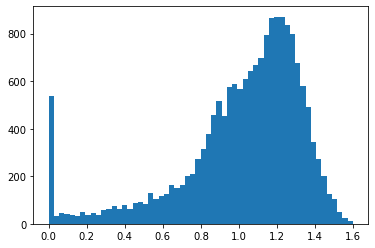

In [80]:
#how does equally does bird spend their time in the different zones
plt.hist(df_daily['distribution_entropy'].dropna(),bins='auto');